# Loading data from the point vessel dataset
For easy access to the data, we provide the VesselData class.

In [1]:
from utils.point_vessel import VesselData
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

point_vessel_path = "/data/wire_harness_tim/data/labels/dvn"
vessel_data = VesselData(point_vessel_path)

In [2]:
# example to get the percentage of the classes in the train set
point_count = 0
class_counts = np.array([0,0])

for set_id in tqdm(vessel_data.get_train_split()):
    for sample_id in range(vessel_data.get_samples_per_set()):
        seg = vessel_data.load_seg(set_id, sample_id).astype(int)
        class_counts += np.bincount(seg, minlength=2)
        point_count += 2048

class_counts = class_counts / point_count
print(f"Wire:        {100*class_counts[0]:.1f}%")
print(f"Bifurcation: {100*class_counts[1]:.1f}%")

  2%|▏         | 2/100 [00:00<00:05, 17.90it/s]

100%|██████████| 100/100 [00:06<00:00, 14.83it/s]

Wire:        67.5%
Bifurcation: 32.5%


(2048, 3)


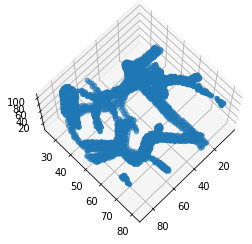

In [3]:
pcl = vessel_data.load_pcl(0, 0)
print(pcl.shape)

# visualization
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=70, azim=45)
ax.scatter3D(pcl[:,0], pcl[:,1], pcl[:,2], )
plt.show()

In [4]:
pcl = vessel_data.load_pcl(1, 0)
seg = vessel_data.load_seg(1, 0)
print(seg.shape)

(2048,)


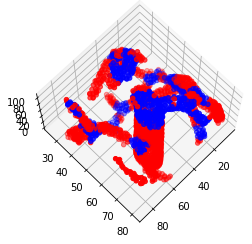

In [11]:
# visualization
colors = [
    'red',
    'blue'
]
seg_colors = [colors[int(i)] for i in seg]
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=70, azim=45)
ax.scatter3D(pcl[:,0], pcl[:,1], pcl[:,2], c=seg_colors)
plt.show()

In [12]:
skeleton = vessel_data.load_skeleton(0, 0)
nodes = skeleton['nodes']
print(nodes.shape)
adj = skeleton['adj']
print(adj.shape)

(933, 3)
(933, 933)


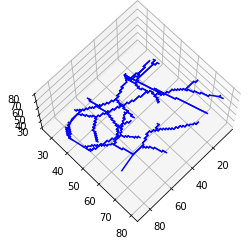

In [13]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=70, azim=45)
for i in range(len(adj)):
    for j in range(i+1, len(adj)):
        if not adj[i,j]:
            continue

        ax.plot3D([nodes[i,0], nodes[j,0]], [nodes[i,1], nodes[j,1]], [nodes[i,1], nodes[j,1]], c="blue")
plt.show()